In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from time import perf_counter

sys.path.append("/Net/Groups/BSI/work_scratch/ppapastefanou/src/QPy")

from src.postprocessing.qnc_defintions import Time_Reduction_Type
from src.postprocessing.qnc_output_parser import QNC_output_parser
from src.postprocessing.qnc_ncdf_reader import QNC_ncdf_reader
from src.postprocessing.qnc_rescaler import QNC_Rescaler
from src.postprocessing.qnc_obs_reader import QNC_obs_reader

In [2]:
os.listdir("/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro")

['06_std_only',
 '03_manu_soil_params_phenology',
 '02_manu_soil_params_phenology',
 '01_manu_soil_params_phenology',
 '04_manu_soil_params_phenology',
 '05_manu_soil_params_phenology',
 '05_std_only']

In [9]:
OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/10_run_slope_opt_manu_soil_params'
OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro/05_manu_soil_params_phenology'
#OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro/06_std_only'
#OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/11_std_only'
post_dir = os.path.join(OUTPUT_DIR, 'post')
rmse_file = os.path.join(post_dir, 'standard_ranking.csv')
parameter_file = os.path.join(OUTPUT_DIR, 'parameters.csv')

In [7]:
df_parameters = pd.read_csv(parameter_file)
df_parameters

,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,root_scale,slope_leaf_close,gdd_t_air_threshold,gdd_t_air_req,k_gdd
0,3.37441,0,0,74.82248,0.000742,-1.25137,6.15626,-5.000000e-07,-11.29774,2.987329e-07,0.51950,208.37536,6.40282,9.0,400.0,0.0154
1,3.99423,1,1,61.13250,0.001699,-0.80572,5.97220,-7.000000e-07,-10.75707,2.683873e-08,0.54558,65.05572,8.13331,9.0,400.0,0.0154
2,4.29005,2,2,267.67583,0.000847,-0.66161,2.88904,-5.000000e-07,-7.68267,1.202367e-08,0.58051,244.35748,9.62785,9.0,400.0,0.0154
3,3.83782,3,3,141.36729,0.001802,-1.15719,5.20739,-9.000000e-07,-8.88948,4.157725e-08,0.55748,100.78530,9.68269,9.0,400.0,0.0154
4,2.50427,4,4,95.98165,0.000895,-0.76004,4.23655,-6.000000e-07,-10.40324,1.170916e-08,0.56649,115.49635,6.57211,9.0,400.0,0.0154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.87378,15355,15355,171.61673,0.001864,-1.09869,5.30662,-9.000000e-07,-10.26237,1.281924e-07,0.50103,205.06945,5.45688,9.0,400.0,0.0154
15356,1.74007,15356,15356,108.09151,0.001413,-1.43536,2.91354,-8.000000e-07,-10.36249,1.091092e-08,0.51990,50.71007,8.54825,9.0,400.0,0.0154
15357,3.29485,15357,15357,192.00161,0.000632,-1.36137,4.20871,-6.000000e-07,-11.74630,9.047479e-08,0.50045,210.77110,5.70477,9.0,400.0,0.0154
15358,1.89616,15358,15358,153.10465,0.000235,-1.38961,6.28051,-6.000000e-07,-10.06731,1.368678e-08,0.59200,58.67606,5.71019,9.0,400.0,0.0154


In [10]:
df_rmse = pd.read_csv(rmse_file)
df_rmse= pd.merge(df_parameters, df_rmse, on='fid')


FileNotFoundError: [Errno 2] No such file or directory: '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro/05_manu_soil_params_phenology/post/standard_ranking.csv'

In [8]:
df_rmse

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
0,-1.42422,0,0,177.02816,-0.83989,5.69387,-0.000008,-11.08914,3.359702e-07,0.51495,...,400.0,0.0154,0.353956,1.636023,3.837999,3.319620,49.618089,54.506601,NaN,-0.069883
1,-2.20187,1,1,150.44905,-0.67183,5.95397,-0.000010,-10.81645,2.716911e-08,0.46190,...,400.0,0.0154,0.353956,1.636023,3.851101,3.147336,42.902760,43.826049,NaN,-0.688116
2,-0.80097,2,2,188.39163,-0.80665,5.83511,-0.000002,-9.13110,7.064269e-09,0.50410,...,400.0,0.0154,0.353956,1.636023,3.826016,3.262648,39.821782,34.709280,NaN,-0.777284
3,-1.12370,3,3,116.65181,-0.88537,5.91168,-0.000009,-8.18479,7.572708e-08,0.55495,...,400.0,0.0154,0.353956,1.636023,3.789609,3.221863,39.582469,34.842812,NaN,-0.757561
4,-1.14748,4,4,167.95802,-0.76513,5.72420,-0.000008,-8.96730,3.264946e-07,0.59118,...,400.0,0.0154,0.353956,1.636023,3.904915,3.273875,40.240922,35.510610,NaN,-0.757607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
10237,-1.08944,10237,10237,116.78804,-0.54508,5.57909,-0.000008,-11.98562,3.976714e-08,0.57912,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,51.225762,46.115663,NaN,0.000000
10238,-1.49180,10238,10238,160.73715,-0.72962,5.65293,-0.000007,-10.87092,7.849774e-08,0.50611,...,400.0,0.0154,0.353956,1.636023,4.461891,3.657107,42.384748,40.312415,NaN,-0.869840


In [9]:
df_rmse.sort_values(by = 'rmse_psi_stem')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
10232,-1.64673,10232,10232,121.21728,-0.55186,5.73981,-0.000007,-9.99137,1.137410e-06,0.48574,...,400.0,0.0154,0.353956,1.636023,3.133018,2.799275,48.558977,52.251553,NaN,-0.289135
10233,-0.51329,10233,10233,164.52049,-0.53674,5.88297,-0.000003,-9.69412,9.520951e-07,0.49922,...,400.0,0.0154,0.353956,1.636023,3.401617,2.884734,42.323347,43.756468,NaN,-0.517712
10234,-1.42731,10234,10234,103.90206,-0.57831,5.53408,-0.000002,-11.51410,4.216758e-07,0.53254,...,400.0,0.0154,0.353956,1.636023,3.980067,3.304467,41.205811,38.269310,NaN,-0.732452
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,-1.82218,35,35,155.21781,-0.70962,5.89500,-0.000003,-8.98023,7.824338e-08,0.57786,...,400.0,0.0154,0.353956,1.636023,3.772671,3.236493,39.539254,34.485690,NaN,-0.770373
36,-1.80691,36,36,110.64727,-0.66674,5.70901,-0.000010,-11.63570,4.839535e-08,0.50085,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.925921,42.296778,NaN,0.000000
37,-0.72170,37,37,171.55828,-0.69829,5.67550,-0.000006,-8.97450,1.131930e-08,0.48672,...,400.0,0.0154,0.353956,1.636023,3.914144,3.264730,40.338061,35.898136,NaN,-0.742664
38,-0.61205,38,38,155.31553,-0.52207,5.52045,-0.000003,-11.91073,5.285727e-08,0.51961,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.153333,43.190700,NaN,0.000000


In [67]:
df_rmse

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
0,4.35290,0,0,169.82412,-0.66731,5.97765,-7.000000e-07,-9.39041,1.611468e-07,0.52800,...,400.0,0.0154,0.353956,1.636023,3.837999,3.319620,49.618089,54.506601,NaN,-0.069883
1,4.20562,1,1,188.61013,-0.66245,5.86741,-6.000000e-07,-9.64332,7.766642e-08,0.52813,...,400.0,0.0154,0.118441,0.809608,3.355837,2.946237,37.842331,33.556966,0.274997,-0.589945
2,2.84888,2,2,184.54530,-0.62806,5.96030,-6.000000e-07,-9.72810,1.245824e-07,0.52054,...,400.0,0.0154,0.123783,1.195555,3.527305,3.201936,38.659096,35.452115,0.252604,-0.467841
3,2.67183,3,3,110.09427,-0.80765,5.79032,-8.000000e-07,-9.04066,1.549773e-07,0.51879,...,400.0,0.0154,0.184728,6.969907,3.263561,3.020254,38.271023,35.478429,0.215575,-0.291826
4,3.75389,4,4,103.77991,-0.58384,5.90243,-8.000000e-07,-9.05021,6.130605e-08,0.51287,...,400.0,0.0154,0.153331,4.672751,3.443992,3.016321,38.192492,34.052999,0.220156,-0.447786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,4.29706,16379,16379,152.64417,-0.62877,5.75528,-6.000000e-07,-10.62172,5.579829e-08,0.52641,...,400.0,0.0154,0.233571,0.774163,3.845653,3.592818,39.590737,35.842773,0.267177,-0.827955
16380,2.79920,16380,16380,168.03452,-0.59352,5.93306,-7.000000e-07,-9.55169,5.224399e-08,0.50254,...,400.0,0.0154,0.166594,2.539531,3.543581,3.067933,38.515864,34.562487,0.223632,-0.369454
16381,2.66716,16381,16381,145.26355,-0.60268,5.94279,-6.000000e-07,-10.53278,5.093572e-08,0.52031,...,400.0,0.0154,0.176377,0.762051,3.995271,3.654752,40.238411,36.275003,0.255285,-0.686455
16382,3.08671,16382,16382,141.61666,-0.54418,5.83114,-6.000000e-07,-10.64443,1.268865e-07,0.52249,...,400.0,0.0154,0.140557,0.945834,3.942526,3.611216,40.199683,36.768478,0.245413,-0.718764


In [10]:
df_rmse.sort_values(by = 'rmse_gpp_22')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
8845,-2.02452,8845,8845,158.69670,-0.64720,5.98757,-0.000001,-8.80168,1.081621e-06,0.45251,...,400.0,0.0154,0.353956,1.636023,3.026534,2.887741,44.033555,47.138252,NaN,-0.252713
5473,-1.81365,5473,5473,112.73529,-0.73159,5.53250,-0.000002,-8.20597,1.856155e-06,0.46973,...,400.0,0.0154,0.353956,1.636023,3.026988,2.893104,44.699952,48.034200,NaN,-0.195660
1080,-2.48009,1080,1080,106.13862,-0.79673,5.62642,-0.000006,-8.05016,6.555192e-07,0.46599,...,400.0,0.0154,0.353956,1.636023,3.031719,2.884059,44.619838,47.886172,NaN,-0.209445
7772,-2.30863,7772,7772,112.05304,-0.51587,5.78842,-0.000004,-8.23619,6.570257e-07,0.46303,...,400.0,0.0154,0.353956,1.636023,3.031867,2.880509,43.838402,46.848735,NaN,-0.254639
9128,-1.61873,9128,9128,136.95646,-0.63735,5.93685,-0.000002,-8.52240,1.702983e-06,0.47221,...,400.0,0.0154,0.353956,1.636023,3.032046,2.884620,45.015104,48.398993,NaN,-0.212738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-1.53817,4085,4085,115.01889,-0.52358,5.61563,-0.000007,-11.35601,5.740376e-08,0.48637,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.811381,43.150477,NaN,0.000000
38,-0.61205,38,38,155.31553,-0.52207,5.52045,-0.000003,-11.91073,5.285727e-08,0.51961,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.153333,43.190700,NaN,0.000000
4088,-0.56180,4088,4088,158.47161,-0.86108,5.72049,-0.000007,-11.95495,1.406416e-08,0.47898,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,43.080460,42.106405,NaN,0.000000
36,-1.80691,36,36,110.64727,-0.66674,5.70901,-0.000010,-11.63570,4.839535e-08,0.50085,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.925921,42.296778,NaN,0.000000


In [69]:
df_rmse.sort_values(by = 'rmse_le_22')

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
14069,3.88522,14069,14069,186.60209,-0.88752,5.78016,-5.000000e-07,-9.91295,8.551002e-08,0.51360,...,400.0,0.0154,0.177184,0.899549,3.123553,2.867589,36.904186,33.835419,0.304800,-0.426906
326,4.47264,326,326,158.38812,-0.85151,5.87247,-5.000000e-07,-9.35108,1.088773e-07,0.52699,...,400.0,0.0154,0.133768,0.659302,3.121456,2.853352,36.924478,33.701373,0.273965,-0.381478
2676,4.33401,2676,2676,187.89607,-0.88928,5.69312,-6.000000e-07,-9.74981,5.826907e-08,0.50121,...,400.0,0.0154,0.144392,0.892106,3.089083,2.859983,36.928541,34.314207,0.297312,-0.362424
7302,4.25867,7302,7302,181.75156,-0.84825,5.79178,-9.000000e-07,-9.69924,6.864125e-08,0.50668,...,400.0,0.0154,0.176675,0.882875,3.128137,2.878580,36.944370,34.084584,0.296032,-0.442736
7567,4.34121,7567,7567,175.34472,-0.88698,5.78712,-7.000000e-07,-9.32825,6.840823e-08,0.52162,...,400.0,0.0154,0.173189,0.764240,3.093302,2.893918,36.946555,33.999798,0.290435,-0.413643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7149,2.53465,7149,7149,127.10584,-0.51455,5.53637,-1.000000e-06,-10.88137,7.771306e-08,0.52586,...,400.0,0.0154,0.169522,0.823425,4.364714,3.861811,41.365590,37.293262,0.259812,-0.757255
9674,2.57505,9674,9674,188.58792,-0.54096,5.63122,-9.000000e-07,-10.72083,6.047354e-08,0.52863,...,400.0,0.0154,0.161812,0.912683,4.334375,3.825185,41.371679,37.057562,0.268152,-0.724471
3229,3.14071,3229,3229,150.42258,-0.51193,5.99209,-7.000000e-07,-10.99751,5.749539e-08,0.52847,...,400.0,0.0154,0.160447,0.719953,4.379137,3.948013,41.655646,37.180769,0.269937,-0.758469
10200,3.45761,10200,10200,147.76850,-0.50454,5.95700,-9.000000e-07,-10.93058,5.619996e-08,0.52728,...,400.0,0.0154,0.164741,0.733548,4.388674,3.990965,41.722866,37.367945,0.270530,-0.803185


In [70]:
df_rmse.sort_values(by = 'rmse_sapflow_norm')

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
12176,4.26969,12176,12176,176.26331,-0.61221,5.75627,-9.000000e-07,-10.24597,1.873954e-07,0.50172,...,400.0,0.0154,0.127843,0.794727,3.319534,2.832869,37.618564,35.296235,0.202531,-0.342686
9207,3.79666,9207,9207,160.23274,-0.67627,5.93146,-7.000000e-07,-10.31230,1.779818e-07,0.50229,...,400.0,0.0154,0.106320,0.753750,3.277676,2.861373,37.511793,35.108332,0.202827,-0.365538
11076,4.49094,11076,11076,117.19017,-0.60727,5.88227,-8.000000e-07,-10.36032,1.489295e-07,0.50619,...,400.0,0.0154,0.110281,1.048178,3.370975,2.918976,37.682442,34.542118,0.203042,-0.497539
757,3.94957,757,757,102.82199,-0.76391,5.68991,-6.000000e-07,-10.56428,1.910188e-07,0.50846,...,400.0,0.0154,0.166195,0.820881,3.236718,2.942091,37.522061,35.265632,0.203126,-0.471857
7562,4.36994,7562,7562,110.47651,-0.60340,5.74570,-7.000000e-07,-10.84154,1.753633e-07,0.50267,...,400.0,0.0154,0.114675,0.912470,3.430642,2.911601,37.946517,35.096650,0.203250,-0.483829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,3.77636,13754,13754,184.73044,-0.88100,5.57353,-6.000000e-07,-10.12971,1.212554e-07,0.51930,...,400.0,0.0154,0.259725,1.064222,3.173865,3.033286,37.555711,35.217274,0.312128,-0.585261
9977,4.26836,9977,9977,187.89048,-0.84568,5.63663,-6.000000e-07,-9.88632,5.309780e-08,0.50901,...,400.0,0.0154,0.244420,1.049126,3.190278,3.034127,37.543830,34.815296,0.313224,-0.620063
9925,3.26209,9925,9925,185.70044,-0.86615,5.91552,-9.000000e-07,-9.76188,5.202793e-08,0.50952,...,400.0,0.0154,0.296720,1.150178,3.294205,3.068274,37.942332,34.671437,0.313816,-0.679760
11162,3.65675,11162,11162,182.37612,-0.89451,5.93418,-8.000000e-07,-10.01322,7.206953e-08,0.52148,...,400.0,0.0154,0.403434,1.066882,3.366418,3.108174,38.129380,34.343170,0.314282,-0.802843


In [71]:
df_rmse.sort_values(by = 'slope_gpp17-19')

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
3700,3.65745,3700,3700,121.36615,-0.88064,5.97018,-8.000000e-07,-10.94038,8.756208e-08,0.52755,...,400.0,0.0154,0.511897,0.982916,3.860313,3.543278,39.676707,35.976766,0.276030,-0.999255
13200,3.89359,13200,13200,104.02112,-0.79316,5.79801,-1.000000e-06,-10.90544,6.528210e-08,0.52099,...,400.0,0.0154,0.487244,0.799500,3.879346,3.592208,39.759301,36.244286,0.254191,-0.993245
5290,3.77989,5290,5290,109.71492,-0.85686,5.86827,-1.000000e-06,-10.95071,9.151053e-08,0.52714,...,400.0,0.0154,0.522777,0.887168,3.817940,3.497818,39.482549,35.858181,0.260098,-0.987544
3766,4.13929,3766,3766,107.54688,-0.69006,5.89984,-9.000000e-07,-10.95150,8.223411e-08,0.52792,...,400.0,0.0154,0.393529,0.780070,4.030682,3.769686,40.276111,36.964191,0.259549,-0.986392
8702,3.31731,8702,8702,111.50427,-0.84337,5.93536,-9.000000e-07,-10.97855,1.273115e-07,0.52559,...,400.0,0.0154,0.514128,0.846726,3.781704,3.406072,39.534660,35.942005,0.247066,-0.970274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,3.09417,16297,16297,115.07635,-0.82708,5.51026,-5.000000e-07,-9.04135,1.550235e-07,0.50140,...,400.0,0.0154,0.262796,21.761280,3.161971,2.822239,37.553320,34.606531,0.210045,-0.127240
15947,3.14499,15947,15947,174.87947,-0.85380,5.54272,-7.000000e-07,-9.05081,1.736155e-07,0.50087,...,400.0,0.0154,0.236344,8.794140,3.088834,2.890747,37.823606,35.949160,0.211679,-0.127115
10178,2.69053,10178,10178,171.49159,-0.85872,5.65443,-6.000000e-07,-9.00647,1.604066e-07,0.50082,...,400.0,0.0154,0.249739,9.834075,3.160995,2.844693,37.695404,34.984579,0.212063,-0.126761
172,3.62902,172,172,170.23639,-0.88572,5.65164,-6.000000e-07,-9.08457,1.825027e-07,0.50374,...,400.0,0.0154,0.231204,4.966884,3.110639,2.834407,37.515288,35.033700,0.208885,-0.116840


In [54]:
#slice_psi_stem = df_rmse[df_rmse['rmse_psi_stem'] < 0.12]
df_rmse.iloc[[7816, 729, 1873]]

,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
7816,8.32894,7816,7816,479.42230,0.00384,3793.04989,0.02819,4.04708,-2.32070,3.61470,...,3.49947,0.00001,0.254685,1.267467,3.621151,3.331374,43.093831,45.183578,0.357550,0.344950
729,9.19161,729,729,151.88494,0.00189,4016.03318,0.01239,4.04749,-2.38129,2.66727,...,1.92751,0.00000,0.179592,1.099305,3.648614,3.332639,43.441201,45.734432,0.232563,0.405473
1873,7.03762,1873,1873,239.14073,0.00279,4081.71164,0.03000,3.53622,-2.24308,3.83950,...,2.85748,0.00000,0.372116,1.081454,3.573063,3.311491,43.055917,44.770392,0.303777,0.254228


In [47]:
slice_psi_stem = df_rmse[df_rmse['rmse_le_24'] < 46.9]
slice_psi_stem.shape

(10239, 23)

In [48]:
slice_psi_stem = df_rmse[df_rmse['rmse_le_22'] < 43.88]
slice_psi_stem.shape

(10239, 23)

In [33]:
slice_psi_stem = df_rmse[df_rmse['rmse_gpp_22'] < 3.7]
slice_psi_stem.shape

(5251, 23)

In [34]:
slice_psi_stem = df_rmse[df_rmse['rmse_gpp_24'] < 3.27]
slice_psi_stem.shape

(9289, 23)

In [15]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_24'] < 3.27)]
slice_psi_stem.shape

(0, 16)

In [17]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_22'] < 3.63)]
slice_psi_stem.shape

(1368, 23)

In [18]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.09) & (df_rmse['rmse_gpp_22'] < 3.63)& (df_rmse['rmse_le_22'] < 43.88)]
slice_psi_stem.shape
slice_psi_stem['fid'].to_list()


[]

In [7]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.09) & (df_rmse['rmse_gpp_22'] < 3.63)& (df_rmse['rmse_le_22'] < 43.88)]
slice_psi_stem.shape
slice_psi_stem


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


In [60]:
slice_psi_stem[['fid', 'rmse_psi_stem','k_xylem_sat', 'kappa_stem', 'kappa_leaf', 'root_dist']].sort_values(by = 'root_dist', ascending=False)['fid'].to_list()

[8635,
 2739,
 13454,
 11833,
 6415,
 14475,
 12545,
 4272,
 2834,
 12739,
 15962,
 14426,
 11843,
 7251,
 7912,
 5702,
 16294,
 15671,
 13467,
 1723,
 5113,
 15723,
 8247,
 4693,
 9946,
 5275,
 2877,
 11590,
 2120,
 11447,
 9703,
 1663,
 8269,
 2281,
 10532,
 10033,
 4914,
 2214,
 9769,
 851,
 4972,
 380,
 6129,
 8025,
 5962,
 7720,
 8949,
 6007]

In [25]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19']  < -0.2) & (df_rmse['rmse_gpp_22'] < 3.2)]
slice_psi_stem.sort_values(by= 'rmse_gpp_22')[0:30]['fid'].to_list()

[8845,
 1080,
 7772,
 9128,
 1466,
 7369,
 6941,
 8643,
 8820,
 3480,
 9275,
 5006,
 7533,
 3977,
 7221,
 1673,
 8710,
 27,
 3279,
 8265,
 165,
 9384,
 549,
 9405,
 8348,
 74,
 7643,
 7670,
 3129,
 9903]

In [16]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.2) & (df_rmse['rmse_gpp_22'] < 3.2)&(df_rmse['rmse_psi_stem'] < 0.13)]
slice_psi_stem.sort_values(by= 'slope_gpp17-19')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


In [50]:
slice_psi_stem.sort_values(by= 'slope_gpp17-19')['fid'][0:300:10].to_list()

[7524,
 4721,
 2866,
 310,
 15478,
 3331,
 5995,
 8648,
 528,
 6486,
 9385,
 6043,
 2055,
 7960,
 10715,
 9422,
 10706,
 965,
 9372,
 8709,
 13343,
 15988,
 4262,
 15162,
 15866,
 4559,
 8865,
 5331,
 1723,
 13990]

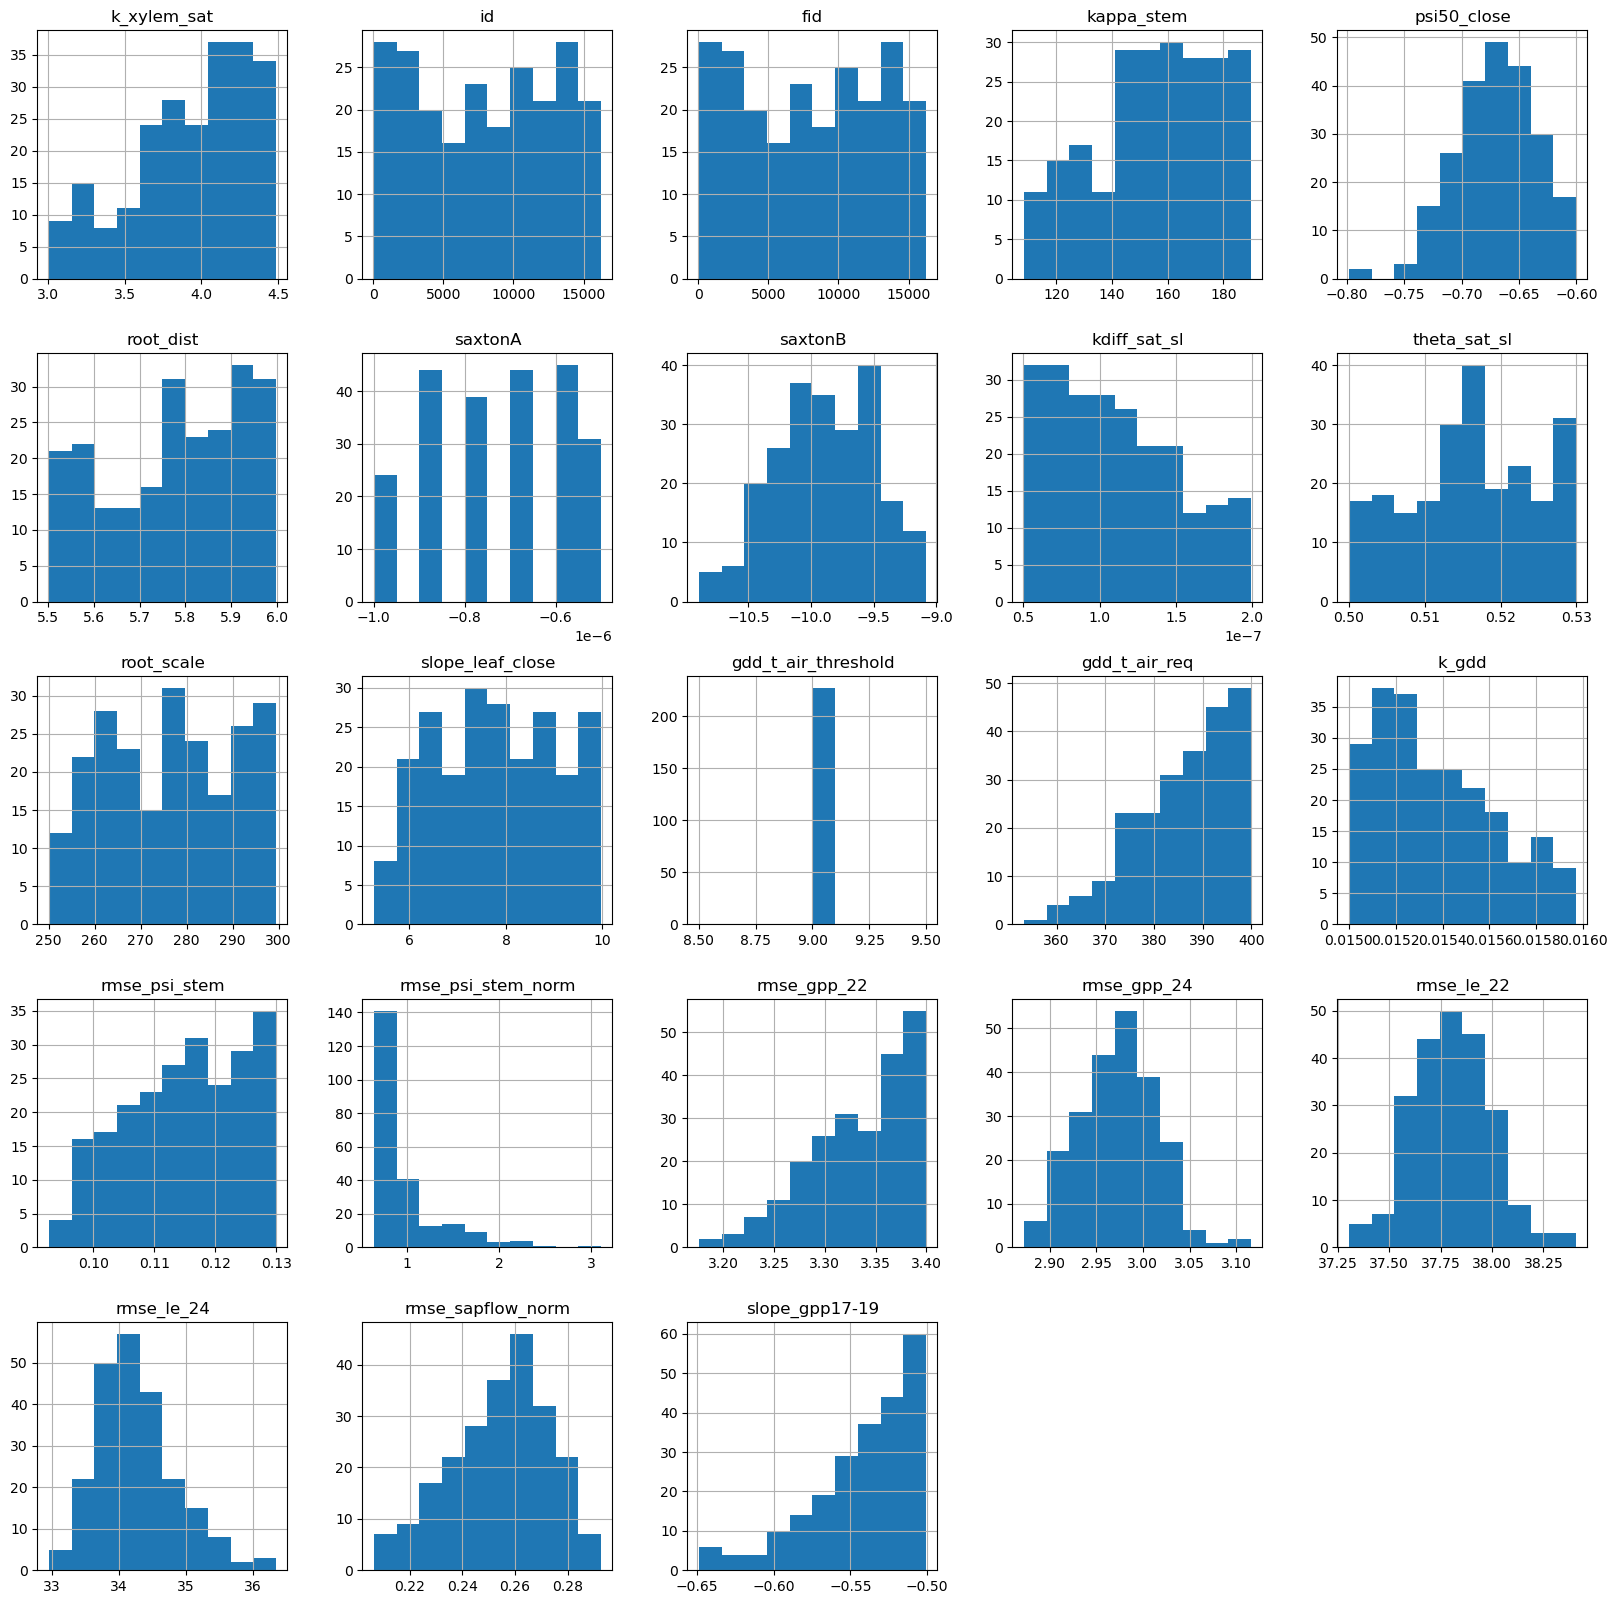

In [25]:
#slice_psi_stem.sort_values(by = 'rmse_gpp_22')['fid'].to_list()
slice_psi_stem.hist(figsize=(20,20));


In [26]:
slice_psi_stem.corr("spearman")

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
k_xylem_sat,1.000000,0.069750,0.069750,-0.026836,0.421630,-0.070021,0.037292,0.019631,0.088538,0.094237,...,-0.019415,-0.069413,-0.030613,-0.053501,-0.244088,-0.304226,-0.336323,-0.182138,-0.067774,-0.214857
id,0.069750,1.000000,1.000000,0.039998,0.002185,0.077563,0.023189,0.011772,0.044737,-0.018565,...,-0.034249,0.020536,-0.028949,0.012761,-0.109287,-0.032846,-0.101300,0.031862,0.026756,0.076769
fid,0.069750,1.000000,1.000000,0.039998,0.002185,0.077563,0.023189,0.011772,0.044737,-0.018565,...,-0.034249,0.020536,-0.028949,0.012761,-0.109287,-0.032846,-0.101300,0.031862,0.026756,0.076769
kappa_stem,-0.026836,0.039998,0.039998,1.000000,-0.123143,-0.058124,0.016760,-0.226697,0.041964,-0.065841,...,-0.091944,0.010478,-0.298659,-0.617917,-0.155743,-0.369708,-0.283572,-0.094504,0.752862,-0.036345
psi50_close,0.421630,0.002185,0.002185,-0.123143,1.000000,-0.031816,-0.006506,-0.257562,0.249642,-0.084378,...,0.108642,0.075907,-0.403603,0.170428,0.415616,-0.111568,0.259319,-0.012664,-0.498344,-0.255991
root_dist,-0.070021,0.077563,0.077563,-0.058124,-0.031816,1.000000,-0.061610,0.203670,-0.007069,-0.054259,...,0.161257,0.152406,0.041290,-0.025051,-0.007271,-0.018418,-0.087630,-0.084168,-0.031107,-0.025619
saxtonA,0.037292,0.023189,0.023189,0.016760,-0.006506,-0.061610,1.000000,-0.293170,0.054001,0.037017,...,-0.025704,-0.127881,-0.020898,-0.010472,-0.027080,-0.099135,-0.101995,-0.186178,0.124104,0.024381
saxtonB,0.019631,0.011772,0.011772,-0.226697,-0.257562,0.203670,-0.293170,1.000000,-0.472722,0.474677,...,0.030651,-0.059227,0.007105,0.126026,-0.256157,0.460030,-0.059035,-0.132579,0.121078,0.219625
kdiff_sat_sl,0.088538,0.044737,0.044737,0.041964,0.249642,-0.007069,0.054001,-0.472722,1.000000,0.191821,...,0.002948,-0.034223,-0.070329,0.171695,-0.012929,-0.042867,0.118904,0.422307,-0.198801,0.026520
theta_sat_sl,0.094237,-0.018565,-0.018565,-0.065841,-0.084378,-0.054259,0.037017,0.474677,0.191821,1.000000,...,-0.013864,-0.147418,-0.026963,-0.073792,0.014113,0.058767,-0.108630,-0.377731,0.161106,0.074343


In [30]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.3) & (df_rmse['rmse_gpp_22'] < 3.3)]
slice_psi_stem.sort_values(by = 'rmse_gpp_22')


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
27524,3.90185,27524,27524,177.61355,-0.72320,5.44393,-4.000000e-07,-9.84137,1.108768e-07,0.50001,...,378.48330,0.01342,0.130548,1.189367,3.152135,2.944176,37.587229,35.205434,0.259355,-0.324919
16178,3.68038,16178,16178,174.73736,-0.73450,5.34246,-2.000000e-07,-10.30274,3.157777e-07,0.51523,...,344.25126,0.01289,0.143260,1.530917,3.159729,2.943016,37.707926,35.349486,0.254273,-0.300210
2438,3.89867,2438,2438,181.39520,-0.70879,5.72652,-3.000000e-07,-10.01457,1.883359e-07,0.50511,...,376.63875,0.01264,0.142066,1.410336,3.162264,2.926756,37.577141,35.170586,0.244839,-0.320046
5728,3.81983,5728,5728,144.02710,-0.70754,5.37758,-6.000000e-07,-10.31744,2.152799e-07,0.50028,...,386.65354,0.01419,0.127578,1.546594,3.175359,2.986862,38.019203,36.867781,0.207910,-0.337316
12425,3.97116,12425,12425,167.49392,-0.73906,5.31052,-9.000000e-07,-10.15822,4.541845e-07,0.52543,...,413.92728,0.01331,0.103428,0.852649,3.181482,2.998075,37.900297,36.657864,0.237993,-0.381580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,3.97526,5040,5040,135.39975,-0.74737,5.35908,-5.000000e-07,-9.63962,2.670183e-07,0.51617,...,413.75126,0.01392,0.127868,2.313683,3.297521,2.980820,37.854179,34.984124,0.230531,-0.388609
31094,3.89726,31094,31094,162.32706,-0.71129,5.54413,-9.000000e-07,-9.97675,3.958175e-07,0.50953,...,388.03315,0.01282,0.142537,0.672347,3.297645,2.981643,38.278587,36.514450,0.251563,-0.529659
64,3.83193,64,64,163.78392,-0.72714,5.61895,-3.000000e-07,-9.29951,1.666868e-07,0.54179,...,384.60065,0.01345,0.118273,0.744156,3.298190,3.037623,37.921996,34.258132,0.231028,-0.479772
7478,3.88376,7478,7478,177.08999,-0.71863,5.71442,-5.000000e-07,-9.86459,1.641952e-07,0.51248,...,318.92019,0.01436,0.106727,0.731450,3.298965,2.950944,37.527980,34.976939,0.262156,-0.376337


In [19]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.4)]
print(slice_psi_stem.shape)
y = slice_psi_stem.mean().to_frame()
slice_psi_stem.sort_values(by = 'slope_gpp17-19')['fid'].to_list()
#slice_psi_stem.sort_values(by = 'slope_gpp17-19')

(2597, 18)


[3160,
 6813,
 3822,
 3346,
 4417,
 5857,
 201,
 5820,
 5700,
 1244,
 2163,
 955,
 1236,
 2490,
 3356,
 2603,
 4916,
 6468,
 7196,
 910,
 2420,
 102,
 2102,
 2857,
 5021,
 6566,
 5912,
 6731,
 2030,
 6423,
 6761,
 5723,
 7163,
 6141,
 3997,
 6201,
 3002,
 811,
 1610,
 2736,
 1407,
 5270,
 7242,
 984,
 4447,
 6179,
 1157,
 1281,
 5146,
 6748,
 2617,
 7207,
 2428,
 1773,
 7341,
 460,
 5736,
 7473,
 3680,
 1606,
 2139,
 6253,
 6292,
 4659,
 3682,
 5360,
 3348,
 6263,
 4050,
 3223,
 4200,
 1086,
 120,
 3289,
 2220,
 939,
 6422,
 7465,
 7625,
 732,
 4209,
 6734,
 6907,
 6497,
 5563,
 1373,
 2385,
 2344,
 2390,
 800,
 792,
 6341,
 1432,
 55,
 4570,
 7225,
 2541,
 7526,
 2254,
 2485,
 850,
 6320,
 5768,
 7333,
 2078,
 7161,
 4706,
 4518,
 4487,
 1573,
 1522,
 6537,
 2621,
 3363,
 4837,
 4754,
 366,
 4814,
 1906,
 4975,
 271,
 2812,
 1596,
 6608,
 5812,
 3395,
 5915,
 7147,
 601,
 1163,
 3065,
 400,
 7123,
 855,
 6499,
 2570,
 5328,
 2393,
 1776,
 3749,
 5985,
 1160,
 1908,
 6322,
 1559,
 5944

In [12]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.1) & (df_rmse['rmse_gpp_22'] < 3.8)]
print(slice_psi_stem.shape)
x = slice_psi_stem.mean().to_frame()

(12, 23)


In [19]:
pd.concat([x,y], axis = 1)

,0,0
k_xylem_sat,1.632756,1.392083e+00
id,3954.750000,3.739402e+03
fid,3954.750000,3.739402e+03
kappa_stem,337.379506,5.743487e+02
kappa_leaf,0.004866,4.757350e-03
k_latosa,4378.037441,4.483900e+03
g0,0.004741,5.667692e-03
g1,3.991393,4.040158e+00
psi50_close,-2.287761,-2.227933e+00
root_dist,2.613124,5.958142e+00


In [17]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_24'] < 3.27)& (df_rmse['rmse_le_24'] < 46.9)& (df_rmse['kappa_stem'] < 146.9)]
print(slice_psi_stem.shape)
slice_psi_stem

(0, 18)


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,silt,sand,root_scale,slope_leaf_close,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


In [18]:
df_rmse['rmse_psi_stem'] < 0.1

0       False
1       False
2        True
3        True
4        True
        ...  
7675    False
7676    False
7677    False
7678    False
7679    False
Name: rmse_psi_stem, Length: 7680, dtype: bool

In [8]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.5)]
slice_psi_stem.sort_values(by = 'slope_gpp17-19')

,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
3050,7.12663,3050,3050,181.79840,0.00129,4975.72012,0.01657,4.18625,-2.11064,6.07120,...,2.42946,0.00000,1.886025,1.303184,3.621833,3.450263,41.744208,43.302107,0.274024,-0.494416
16317,7.36067,16317,16317,379.47151,0.00191,3726.30267,0.02566,4.48837,-2.22848,4.26581,...,3.80576,0.00013,1.744992,1.508668,3.674824,3.316684,41.902701,44.006849,0.381554,-0.462265
8220,7.19042,8220,8220,142.77323,0.00190,3457.81458,0.02105,4.06892,-2.34157,6.39746,...,3.99327,0.00000,2.026807,1.283532,3.847743,3.471572,41.510224,42.880313,0.268770,-0.427161
15476,5.10867,15476,15476,108.23469,0.00106,3388.17495,0.02737,3.58814,-2.13659,5.45557,...,3.83835,0.00000,1.634213,1.185986,3.826736,3.312410,41.696434,42.856126,0.249182,-0.388104
14592,5.68199,14592,14592,178.28710,0.00096,3305.15757,0.02782,3.63422,-2.14758,6.43853,...,2.17614,0.00003,1.781059,1.215818,3.903474,3.345852,42.181743,43.384342,0.271171,-0.376869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15556,6.24602,15556,15556,161.91849,0.00192,4552.62436,0.01466,4.44771,-2.26033,5.63616,...,2.75917,0.00000,1.679320,1.355636,3.476238,3.338658,42.514716,45.140637,0.311842,-0.101928
15238,2.73490,15238,15238,132.60065,0.00205,4844.32529,0.00878,4.32299,-2.42628,6.19859,...,2.97350,0.00004,1.729567,1.301366,3.457513,3.352219,41.701376,44.051572,0.258285,-0.101269
11441,6.62456,11441,11441,319.65484,0.00170,4403.28375,0.02086,4.29294,-2.09868,6.31746,...,3.26080,0.00000,1.383721,1.473296,3.503242,3.329053,42.071607,44.102831,0.316309,-0.101193
1267,5.44054,1267,1267,311.33566,0.00973,4562.75088,0.00763,4.07190,-2.00118,4.69115,...,3.17369,0.00013,1.398537,1.459052,3.501019,3.315061,41.103466,42.996485,0.354146,-0.100636


,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,6.183293,8253.328125,8253.328125,337.249592,0.003079,4312.460016,0.016151,4.158582,-2.200374,5.477713,...,2.828006,0.000059,1.601844,1.439745,3.579033,3.322312,41.838605,43.735401,0.343497,-0.180855
std,2.098295,4981.635748,4981.635748,109.616285,0.002441,467.656887,0.007160,0.283818,0.135668,0.870433,...,0.731041,0.000138,0.240179,0.082969,0.106221,0.039478,0.723023,1.099291,0.038095,0.082110
min,2.553800,19.000000,19.000000,101.825890,0.000550,3305.157570,0.005350,3.511700,-2.498870,2.872550,...,1.178510,0.000000,0.867407,1.125570,3.399654,3.232545,40.671598,41.836024,0.216230,-0.494416
25%,4.503705,4087.750000,4087.750000,239.114008,0.001385,3962.003068,0.009692,4.047555,-2.296867,5.011245,...,2.283243,0.000000,1.479921,1.407203,3.499443,3.295305,41.332215,42.958789,0.320309,-0.208726
50%,6.176820,7949.000000,7949.000000,364.173265,0.002280,4402.748030,0.015530,4.221305,-2.203435,5.633255,...,2.952775,0.000010,1.636125,1.463343,3.558010,3.318647,41.694507,43.615643,0.358493,-0.150278
75%,8.255395,12791.500000,12791.500000,423.129230,0.003398,4689.592932,0.021410,4.399390,-2.081593,6.160592,...,3.395212,0.000043,1.771357,1.496977,3.633161,3.349883,42.282513,44.378341,0.371531,-0.120856
max,9.473780,16317.000000,16317.000000,498.803430,0.009730,4988.816660,0.029910,4.494640,-2.001180,6.498610,...,3.993270,0.001070,2.131521,1.542873,3.903474,3.471572,45.064102,48.332269,0.387675,-0.100428


In [35]:
slice_psi_stem.sort_values(by = 'rmse_psi_stem', ascending=False)['fid'].to_list()

[4500,
 627,
 12283,
 3609,
 15405,
 3668,
 7024,
 1885,
 4878,
 8000,
 13183,
 9586,
 11197,
 6050,
 7527,
 11823,
 13293,
 5121,
 10434,
 11336,
 157,
 6801,
 5289,
 15197,
 16348,
 15201,
 7086,
 4310,
 5195,
 8556,
 9535,
 15691,
 1632,
 14985,
 1556,
 10872,
 2581,
 4763,
 1194,
 14746,
 11448,
 15062,
 14805,
 4970,
 12127,
 2579,
 3058,
 2210,
 11083,
 13774,
 12171,
 5757,
 632,
 3664,
 1770,
 1094,
 2322,
 9941,
 9643,
 2475,
 8665,
 7131,
 5476,
 11688,
 6101,
 11897,
 14544,
 1862,
 6982,
 3470,
 7735,
 466,
 9897,
 5026,
 2531,
 8284,
 3194,
 6816,
 5145,
 6998,
 1458,
 11399,
 10628,
 13935,
 2736,
 4622,
 7427,
 15648,
 4224,
 8285,
 15961,
 1311,
 12294,
 10543,
 8524,
 346,
 4703,
 4116,
 11248,
 3196,
 11937,
 14464,
 6435,
 10906,
 11288,
 397,
 7708,
 15574,
 15256,
 12537,
 6817,
 11199,
 3405,
 11513,
 4318,
 1423,
 9395,
 13076,
 2883,
 6315,
 9187,
 2927,
 631,
 10294,
 15494,
 14704,
 10128,
 9362,
 15974,
 7260,
 2587,
 4761,
 555,
 7923,
 2098,
 815,
 5826,
 1

In [40]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.5)]
slice_psi_stem.sort_values(by = 'slope_gpp17-19', ascending=False)['fid'].to_list()


[8193,
 454,
 11671,
 6521,
 12277,
 4576,
 9792,
 1387,
 13066,
 10347,
 12123,
 4217,
 15260,
 7585,
 10066,
 8354,
 294,
 10220,
 14573,
 12272,
 6477,
 1730,
 7831,
 7424,
 5047,
 5024,
 15688,
 5637,
 7558,
 1084,
 10299,
 12937,
 8971,
 2968,
 9942,
 6953,
 9210,
 6655,
 10759,
 11797,
 8514,
 1662,
 3815,
 9177,
 11373,
 12779,
 14038,
 4359,
 14222,
 8408,
 6225,
 1101,
 5157,
 12958,
 10141,
 2392,
 1997,
 16113,
 13579,
 1133,
 13083,
 5652,
 5243,
 4493,
 11157,
 10457,
 10920,
 2202,
 6333,
 4173,
 7428,
 16250,
 9331,
 5980,
 14936,
 16171,
 12440,
 15008,
 14335,
 3499,
 69,
 13060,
 4508,
 9788,
 6851,
 6827,
 12201,
 14659,
 14243,
 11431,
 7287,
 7444,
 2867,
 12635,
 12308,
 1222,
 7394,
 10562,
 12908,
 7520,
 2707,
 8337,
 15823,
 14815,
 5298,
 13406,
 13861,
 4897,
 4536,
 2139,
 13751,
 15676,
 8547,
 12258,
 7126,
 9644,
 16367,
 4738,
 7064,
 14467,
 15529,
 12798,
 1252,
 6021,
 3641,
 4403,
 1816,
 14296,
 6126,
 768,
 9512,
 4955,
 2096,
 5841,
 935,
 12343,

In [9]:
import xarray

In [10]:
QNC_ncdf_reader(OUTPUT_DIR)

TypeError: QNC_ncdf_reader.__init__() missing 3 required positional arguments: 'output_cats', 'output_identifier', and 'output_time_res'